In [2]:
from scipy.fftpack import dct, idct
import numpy as np
import scipy as sp
from scipy.fftpack import dctn, idctn
import matplotlib.pyplot as plt
from scipy.fftpack import fftn
from scipy.ndimage import fourier_shift

In [3]:


# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')    


def cnt_nonzero(a):
    
    pass

def vis_lss(lss, titles):
    n = len(lss)
    fig, axs = plt.subplots(nrows=1, ncols=n, figsize=(15, 12))
    if n > 1:
        axs = axs.reshape(-1)
    else:
        axs = [axs]

    for i in range(n):
        im = axs[i].imshow(lss[i])
        axs[i].set_title(titles[i])
    
    fig.colorbar(im, ax=[axs[i] for i in range(n)])
    plt.show()

In [21]:
def to_matrix(a):
    d = len(a.shape)
    half_d = d // 2
    shape0 = a.shape[0]
    return a.reshape((shape0 ** half_d, shape0 ** half_d))

def nonzero_ratio_fft(ls):
    # ls = to_matrix(ls)
    f = np.fft.fftn(ls)
    print("Using FFT")
    print("original shape            =", ls.shape)
    # print("original min, max         =", ls.min(), ls.max())
    # print("after transform, shape    =", f.shape)
    print("after transform, min, max =", f.min(), f.max())
    nonzero_ids = np.argwhere(np.abs(f) > 1e-6)
    nonzero_ratio = len(nonzero_ids) * 1.0 / np.prod(ls.shape)
    print("# nonzero, nonzero_ratio  =", len(nonzero_ids), nonzero_ratio)

    plot_CDF(np.abs(f))
    # one_d = np.abs(f).reshape(-1)
    # plt.hist(one_d, bins=30)
    print("")
    
    return nonzero_ratio


def nonzero_ratio_dct(ls):
    f = dctn(ls)
    print("Using DCT:")
    print("original shape            =", ls.shape)
    # print("original min, max         =", ls.min(), ls.max())
    # print("after transform, shape    =", f.shape)
    print("after transform, min, max =", f.min(), f.max())
    nonzero_ids = np.argwhere(np.abs(f) > 1e-6)
    # print(nonzero_ids.shape)
    # print(nonzero_ids[0])
    nonzero_ratio = len(nonzero_ids) * 1.0 / np.prod(ls.shape)
    print("# nonzero, nonzero_ratio  =", len(nonzero_ids), nonzero_ratio)

    plot_CDF(f)
    
    print("")

    return nonzero_ratio


def plot_CDF(data):
    data = data.reshape(-1)
    
    # getting data of the histogram
    count, bins_count = np.histogram(data, bins=200)
    
    # finding the PDF of the histogram using count values
    pdf = count / sum(count)
    print(sum(count))
    
    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    
    # plotting PDF and CDF
    print(len(bins_count[1:]), len(pdf), len(cdf))
    # plt.semilogx(bins_count[1:], pdf, color="red", label="PDF")
    # plt.semilogx(bins_count[1:], cdf, label="CDF")

    # plt.scatter(bins_count[1:], pdf, color="red", label="PDF")
    # plt.scatter(bins_count[1:], cdf, label="CDF")

    plt.plot(bins_count[1:], pdf, color="red", label="PDF")
    plt.plot(bins_count[1:], cdf, label="CDF")
    
    # plt.xticks(bins_count[1:])
    plt.xscale("log")
    plt.legend()
    plt.show()


def power_spectrum(data: np.ndarray):
    data_fft = fftn(data)

    d = len(data.shape)

    # Shift the zero frequency component to the center of the spectrum
    shift = (data.shape[i] // 2 for i in range(d))
    data_fft_shifted = fourier_shift(data_fft, shift)

    # Compute the power spectrum (squared magnitude of the Fourier coefficients)
    power_spectrum = np.abs(data_fft_shifted)**2

    # Normalize the power spectrum
    power_spectrum /= power_spectrum.max()

    print("shape of power spectrum =", power_spectrum.shape)
    nonzero_ids = np.argwhere(np.abs(power_spectrum) > 1e-6)
    print("# nonzeros =", len(nonzero_ids))

    # Display the power spectrum
    if d == 4:
        plt.imshow(power_spectrum[:,:,0,0], cmap='gray')
        plt.show()
    elif d == 6:
        plt.imshow(power_spectrum[:,:,0,0,0,0], cmap='gray')
        plt.show()


Using FFT
original shape            = (14, 14, 14, 14, 14, 14)
after transform, min, max = (-668983.9878045222+152691.22968788096j) (26567833.225510072+0j)
# nonzero, nonzero_ratio  = 1369 0.0001818173125143435
7529536
200 200 200


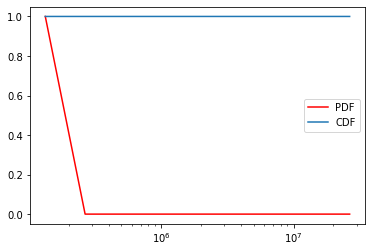


Using DCT:
original shape            = (14, 14, 14, 14, 14, 14)
after transform, min, max = -43916042.08322674 1700341326.4326444
# nonzero, nonzero_ratio  = 361 4.7944521415396645e-05
7529536
200 200 200


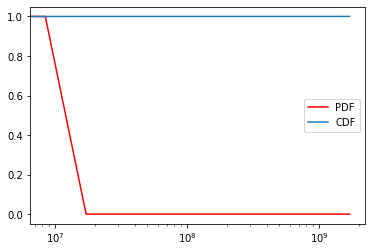


shape of power spectrum = (14, 14, 14, 14, 14, 14)
# nonzeros = 49


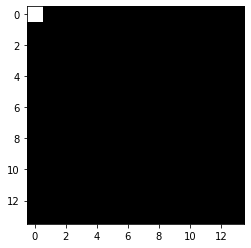

In [22]:
path = "figs/grid_search/twolocal/maxcut/sv-ideal-p=0/maxcut-sv-ideal-n=6-p=0-seed=0-14-100-100.npz"
ls = np.load(path, allow_pickle=True)['data']

nonzero_ratio_fft(ls)
nonzero_ratio_dct(ls)

power_spectrum(ls)

# plot_CDF(ls)

# im_v = idct2(im_f)

# vis_lss([ls, im_f, im_v], ['origin 2D', 'After DCT', 'After iDCT'])
# vis_lss([ls, im_f], 
# ['origin 2D', 'After DCT'])
# a = np.array([0.0, 1, 3, 2, 0.0])
# np.argwhere(a > 1e-6)

Using FFT
original shape            = (12, 12, 15, 15)
after transform, min, max = (-29235.295377534047-14896.127018340432j) (33487.445508635254+1755.0026529694242j)
# nonzero, nonzero_ratio  = 32398 0.9999382716049383
32400
200 200 200


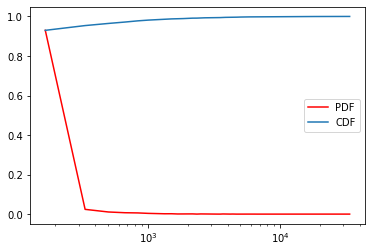


Using DCT:
original shape            = (12, 12, 15, 15)
after transform, min, max = -264606.2974802406 661540.4681748126
# nonzero, nonzero_ratio  = 15998 0.49376543209876544
32400
200 200 200


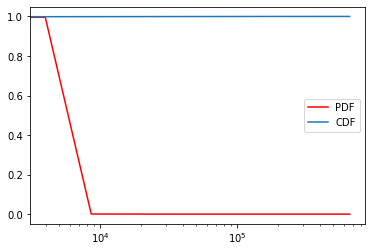


shape of power spectrum = (12, 12, 15, 15)
# nonzeros = 5375


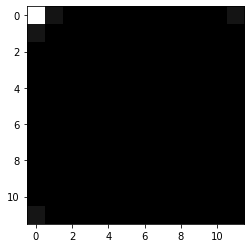

In [39]:
ls = np.load(
    "figs/grid_search/qaoa/maxcut/sv-ideal-p=2/maxcut-sv-ideal-n=24-p=2-seed=15-12-15.npz",
    # "figs/grid_search/qaoa/maxcut/sv-ideal-p=1/maxcut-sv-ideal-n=30-p=1-seed=15-50-100.npz",
    allow_pickle=True
)['data']

nonzero_ratio_fft(ls)
nonzero_ratio_dct(ls)

power_spectrum(ls)

# plot_CDF(ls)

Using FFT
original shape            = (12, 12, 15, 15)
after transform, min, max = (-151.83921385636089+17.5893222229747j) (16217.50112450706+0j)
# nonzero, nonzero_ratio  = 32400 1.0
32400
200 200 200


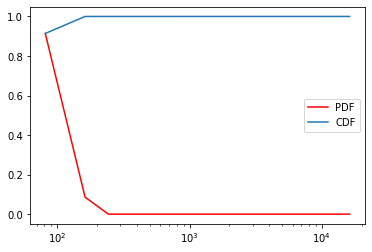


Using DCT:
original shape            = (12, 12, 15, 15)
after transform, min, max = -1514.1310435191695 259480.01799211296
# nonzero, nonzero_ratio  = 32400 1.0
32400
200 200 200


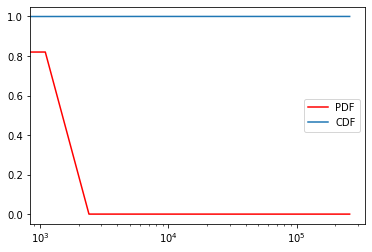

1.0

In [41]:
rng = np.random.default_rng(42)
random_ls = rng.random(size=ls.shape) # [0, 1)

nonzero_ratio_fft(random_ls)
nonzero_ratio_dct(random_ls)


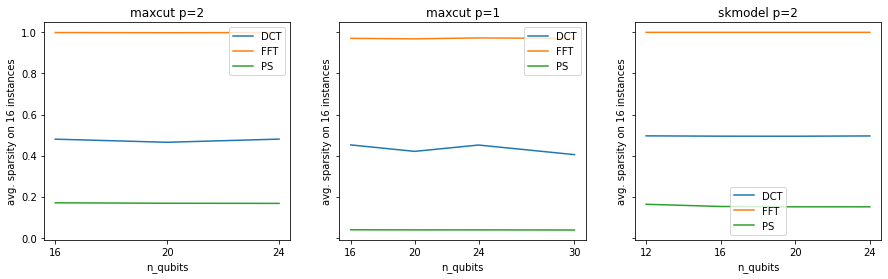

In [38]:
# Matplotlib中多子图绘图时，坐标轴及其label的几种排布方式
# https://zodiac911.github.io/blog/matplotlib-axis.html
def vis_sparsity(ax: plt.Axes, problem: str, p: int):
    if problem == 'maxcut':
        if p == 2:
            path = "figs/sparsity/ns=[16, 20, 24]-seeds=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]-ansatz=qaoa-problem=maxcut-noise=ideal-p=2.npz"
        elif p == 1:
            path = "figs/sparsity/ns=[16, 20, 24, 30]-seeds=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]-ansatz=qaoa-problem=maxcut-noise=ideal-p=1.npz"
    elif problem == 'skmodel':
        path = "figs/sparsity/ns=[12, 16, 20, 24]-seeds=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]-ansatz=qaoa-problem=skmodel-noise=ideal-p=2.npz"

    data = np.load(path, allow_pickle=True)
    data = dict(data)

    seeds = data['seeds']
    ns = data['n_qubits_list']
    labels = data['labels']
    # reshape(len(n_qubits_list), len(seeds))



    for label in labels:
        sparsity = data[label]
        sparsity = np.mean(sparsity, axis=1)

        ax.plot(ns, sparsity, label=label)

    ax.set_xlabel('n_qubits')
    ax.set_ylabel('avg. sparsity on 16 instances')
    ax.set_title(f"{problem} p={p}")
    # ax.set_super_title('Sparsity of QAOA ansatz')
    ax.set_xticks(ns)
    ax.legend()

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

vis_sparsity(axs[0], 'maxcut', 2)
vis_sparsity(axs[1], 'maxcut', 1)
vis_sparsity(axs[2], 'skmodel', 2)

plt.show()